## Importações e Informações do dataset

In [1]:
# Importações necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Carregamento dos dados
file_path = '/content/drive/MyDrive/covid_data.csv'
data = pd.read_csv(file_path)

# Visualização dos dados
print("Primeiros registros do dataset:\n")
data.head()

# Visualização dos tipos de dados
print("\nTipos de dados no dataset:\n")
print(data.dtypes)

Primeiros registros do dataset:


Tipos de dados no dataset:

USMER                    int64
MEDICAL_UNIT             int64
SEX                      int64
PATIENT_TYPE             int64
DATE_DIED               object
INTUBED                  int64
PNEUMONIA                int64
AGE                      int64
PREGNANT                 int64
DIABETES                 int64
COPD                     int64
ASTHMA                   int64
INMSUPR                  int64
HIPERTENSION             int64
OTHER_DISEASE            int64
CARDIOVASCULAR           int64
OBESITY                  int64
RENAL_CHRONIC            int64
TOBACCO                  int64
CLASIFFICATION_FINAL     int64
ICU                      int64
dtype: object


## Pré-processamento

In [2]:
# Tratamento de valores faltantes (se necessário)
data = data.dropna()

# Transformação de atributos categóricos para numéricos
categorical_columns = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical_columns)

# Amostragem do dataset para evitar estouro de memória
data_sampled = data.sample(n=10000, random_state=42)  # Ajuste o valor conforme necessário

# Separação entre atributos (X) e rótulos (y)
X = data_sampled.drop(columns=['CLASIFFICATION_FINAL'])
y = data_sampled['CLASIFFICATION_FINAL']

# Divisão do conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Seleção de atributos
select_k_best = SelectKBest(f_classif, k=50)  # Mantém 50 atributos mais relevantes
X_train = select_k_best.fit_transform(X_train, y_train)
X_test = select_k_best.transform(X_test)

# Redução da dimensionalidade usando PCA
pca = PCA(n_components=0.95)  # Mantém 95% da variância explicada
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: UserWarning: Features [ 19  20  21  22  24  26  29  30  31  32  34  36  38  42  43  44  45  46
  47  48  53  54  55  56  57  59  63  64  65  66  67  68  69  70  71  75
  76  77  78  79  80  81  82  83  85  89  90  91  92  93  94  95  96  97
  98 104 105 106 108 109 110 111 116 117 118 119 120 121 122 124 128 129
 130 131 132 133 134 135 136 137 141 142 143 144 145 146 147 148 149 150
 154 155 157 158 161 166 167 168 169 170 172 173 177 178 179 180 181 182
 183 184 185 187 191 192 193 194 195 196 197 198 200 204 205 206 207 209
 210 211 213 217 218 219 220 222 223 224 225 227 231 233 234 235 236 237
 239 241 245 246 247 248 250 251 252 253 254 256 260 261 262 263 264 265
 266 267 268 270 274 275 276 277 279 281 286 287 288 289 290 291 292 293
 295 299 300 301 302 303 304 305 306 307 308 313 314 315 316 317 318 319
 320 321 322 324 328 329 330 331 332 333 334 335 336 338 343 344 345 346
 347 3

## Regressão Linear

Matriz de Confusão:


[[  0   0   6   0   0   5   5]
 [  0   0   6   0   0   0   0]
 [  0   0 435   2   1 147  99]
 [  0   0   2   0   0   1   1]
 [  0   0  43   1   0  14   9]
 [  2   0 139   0   3  60  37]
 [ 10   0 532   2   7 273 158]]

Relatório de Classificação:


              precision    recall  f1-score   support

           1       0.00      0.00      0.00        16
           2       0.00      0.00      0.00         6
           3       0.37      0.64      0.47       684
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00        67
           6       0.12      0.25      0.16       241
           7       0.51      0.16      0.24       982

    accuracy                           0.33      2000
   macro avg       0.14      0.15      0.13      2000
weighted avg       0.39      0.33      0.30      2000


Acurácia:
0.3265


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


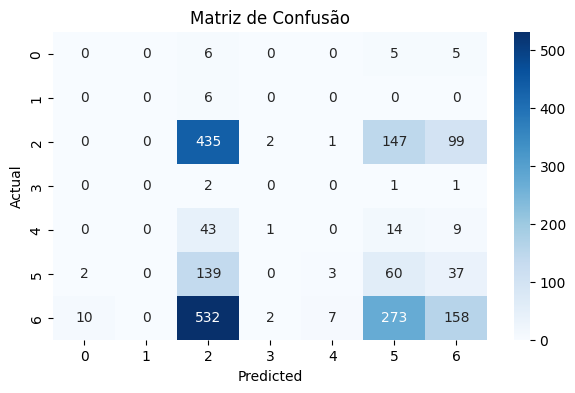

In [3]:
# Criação e treinamento do Perceptron
clf = Perceptron()
clf.fit(X_train, y_train)

# Predição e avaliação do modelo
y_pred = clf.predict(X_test)

# Avaliação do modelo
print("Matriz de Confusão:\n\n")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

print("\nRelatório de Classificação:\n\n")
print(classification_report(y_test, y_pred))
print("\nAcurácia:")
print(accuracy_score(y_test, y_pred))

# Visualização da matriz de confusão
plt.figure(figsize=(7, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()